### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Installing required libraries

In [ ]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 45.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=f3da51315734b5612beb791f29f017ef33896f9ee5999e1bda189b4eda643e68
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
# import os
# #os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"
import findspark
#findspark.init()
#findspark.find()
import pyspark
from pyspark.sql import DataFrame, SparkSession

In [ ]:
spark = SparkSession \
       .builder \
       .appName("Cloud Engg Part 2 Assignment") \
       .getOrCreate()

spark

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Employee_Compensation.csv', inferSchema=True, header=True)

In [ ]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 1.1 Display the number of rows and columns in the dataset

In [ ]:
  # extracting number of rows from the Dataframe
  row = df.count()
   
  # extracting number of columns from the Dataframe
  col = len(df.columns)
 
  # printing
  print(f'Dimension of the Dataframe is: {(row,col)}')
  print(f'Number of Rows are: {row}')
  print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (291825, 22)
Number of Rows are: 291825
Number of Columns are: 22


### 1.2 Check the datatype of the variables

In [ ]:
#col_names = ["Year Type", "Year", "Organization Group Code", "Organization Group", "Department Code", "Department", "Union Code", "Union", "Job Family Code", "Job Family", "Job Code", "Job", "Employee Identifier", "Salaries", "Overtime", "Other Salaries", "Total Salary", "Retirement", "Health/Dental", "Other Benefits", "Total Benefits", "Total Compensation"]

for col in df.dtypes:
    print(col[0]+" : "+col[1])


Year Type : string
Year : int
Organization Group Code : int
Organization Group : string
Department Code : string
Department : string
Union Code : int
Union : string
Job Family Code : string
Job Family : string
Job Code : string
Job : string
Employee Identifier : int
Salaries : double
Overtime : double
Other Salaries : double
Total Salary : double
Retirement : double
Health/Dental : double
Other Benefits : double
Total Benefits : double
Total Compensation : double


### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [ ]:
# df_string_columns = ["Job Family Code","Job Code"]


In [ ]:
# for col in df_string_columns:
#    df = df.withColumn(col , df[col].cast(IntegerType()))


In [ ]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [ ]:
redundant_features_col = ["Organization Group","Department","Union","Job Family","Job","Employee Identifier"]
df = df.drop(*redundant_features_col)
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe().show()

+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|Department Code|       Union Code|   Job Family Code|          Job Code|         Salaries|          Overtime|   Other Salaries|      Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|   291825|            291825|                 291825|         291825|           29

In [ ]:
sal_col = ['Salaries','Overtime','Other Salaries','Total Salary','Retirement',\
 'Health/Dental','Other Benefits','Total Benefits','Total Compensation']
for col in sal_col:
  print("No of rows having negative values in column {} = ".format(col),df.filter(df[col] < 0).count())

No of rows having negative values in column Salaries =  79
No of rows having negative values in column Overtime =  30
No of rows having negative values in column Other Salaries =  62
No of rows having negative values in column Total Salary =  51
No of rows having negative values in column Retirement =  422
No of rows having negative values in column Health/Dental =  344
No of rows having negative values in column Other Benefits =  679
No of rows having negative values in column Total Benefits =  449
No of rows having negative values in column Total Compensation =  246


In [ ]:
sal_col = ['Salaries','Overtime','Other Salaries','Total Salary','Retirement',\
 'Health/Dental','Other Benefits','Total Benefits','Total Compensation']
for col in sal_col:
  print("No of rows having negative values in column {} = ".format(col),df.filter(df[col] < 0).count())
  emp_df = df.filter(df[col] > 0)

No of rows having negative values in column Salaries =  79
No of rows having negative values in column Overtime =  30
No of rows having negative values in column Other Salaries =  62
No of rows having negative values in column Total Salary =  51
No of rows having negative values in column Retirement =  422
No of rows having negative values in column Health/Dental =  344
No of rows having negative values in column Other Benefits =  679
No of rows having negative values in column Total Benefits =  449
No of rows having negative values in column Total Compensation =  246


In [ ]:
emp_df.count()

291577

In [ ]:
df.count()

291825

### 4. Perform Missing Value Analysis

In [ ]:
from pyspark.sql.functions import isnull, when, count, col, isnan

emp_df.select([count(when(isnull(c), c)).alias(c) for c in emp_df.columns]).show()

+---------+----+-----------------------+---------------+----------+---------------+--------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Department Code|Union Code|Job Family Code|Job Code|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+---------------+----------+---------------+--------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|              0|        43|             45|       0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+-----------------------+---------------+----------+---------------+--------+--------+--------+--------------+------------+----------

In [ ]:
dataset = emp_df.replace('null', None)\
        .dropna(how='any')

In [ ]:
dataset.count()

291532

### 5. Exploratory Data Analysis

In [ ]:
dataset.columns

['Year Type',
 'Year',
 'Organization Group Code',
 'Department Code',
 'Union Code',
 'Job Family Code',
 'Job Code',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation']

#### 5.1. Find top compensating organizations. Display using bar plot

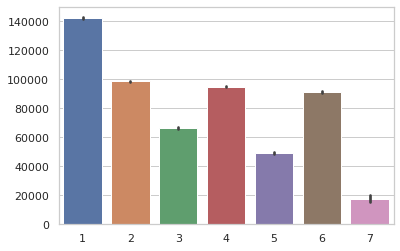

In [ ]:
import seaborn as sns

org_groups = [data[0] for data in dataset.select("Organization Group Code").collect()]
Total_Compensation = [data[0] for data in dataset.select("Total Compensation").collect()]
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=org_groups, y=Total_Compensation, data=tips)


#### 5.2. Find top Compensating Jobs. Display using bar plot

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

df1 = dataset.groupBy("Job Code") \
    .agg(max("Total Compensation").alias("total_comp")) \
    .orderBy(col("total_comp").desc())
df1.show()

+--------+----------+
|Job Code|total_comp|
+--------+----------+
|    1119| 653498.15|
|    0402| 510574.44|
|    2598|  497505.0|
|    0390| 466798.21|
|    0965| 433302.72|
|    0140| 426006.85|
|    H040| 425605.01|
|    1164| 422799.94|
|    9989| 422019.78|
|    2232| 418013.58|
|    9186| 410459.56|
|    H050| 406063.04|
|    1117| 403743.76|
|    8304| 402204.51|
|    1166| 395626.45|
|    2233| 390385.45|
|    1190| 382624.61|
|    H020| 376938.29|
|    0150| 376513.82|
|    0490| 373599.91|
+--------+----------+
only showing top 20 rows



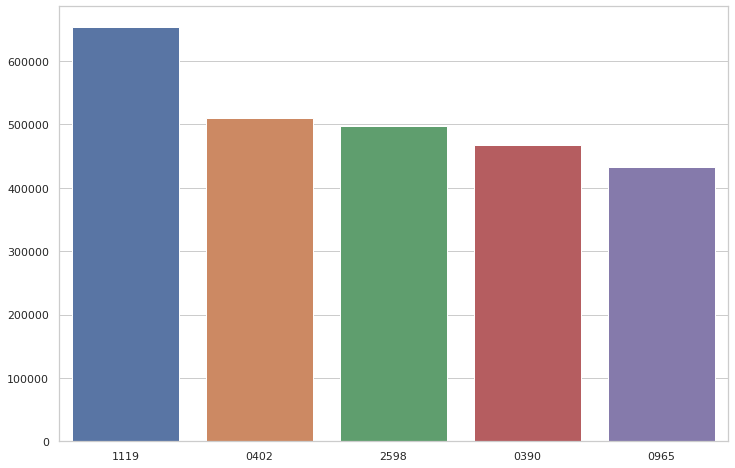

In [ ]:
top_jobs = [data[0] for data in df1.select("Job Code").collect()]
top_jobs = top_jobs[:5]
#print(top_jobs)
top_salaries = [data[0] for data in df1.select("total_comp").collect()]
top_salaries=top_salaries[:5]
#print(top_salaries)
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=top_jobs, y=top_salaries, data=tips)

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [ ]:
numericalColumns = [item[0] for item in dataset.dtypes if not item[1].startswith('string')]
#print(numericalColumns)

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

assembler = VectorAssembler(inputCols=numericalColumns, outputCol="features",handleInvalid='keep')
assembled_df = assembler.transform(dataset).select("features")

# correlation will be in Dense Matrix
correlation = Correlation.corr(assembled_df,"features","pearson").collect()[0][0]

# To convert Dense Matrix into DataFrame
rows = correlation.toArray().tolist()
print(type(rows))
print(rows)
print(len(rows))

<class 'list'>
[[1.0, -0.005568577991775973, -0.0037586952107381937, 0.0056502376004927595, 0.016268016680303362, -0.01678445218180064, 0.00580978142664444, 0.015638391460491004, -0.011736544323567192, 0.031223604687400968, 0.012732131706790953, 0.007632302973503373], [-0.005568577991775973, 1.0, -0.006770059845027995, -0.2170531435455699, -0.30296117362597025, -0.22831438436369123, -0.28361020985574714, -0.24652717998591445, -0.23297338182945732, 0.025050982998410583, -0.2059084304533802, -0.2695799367356757], [-0.0037586952107381937, -0.006770059845027995, 1.0, -0.04826842856740863, 0.06062219967155973, 0.17182591655993484, -0.003056501565161525, -0.06683285622672987, -0.07324293071142404, -0.2821213006691327, -0.12393368291092693, -0.0330682329144873], [0.0056502376004927595, -0.2170531435455699, -0.04826842856740863, 1.0, 0.2709784075469221, 0.3240121383200941, 0.9604409765461459, 0.9527002388106607, 0.7742630485132015, 0.6964018157173465, 0.9379029990943936, 0.9725519004910219], [

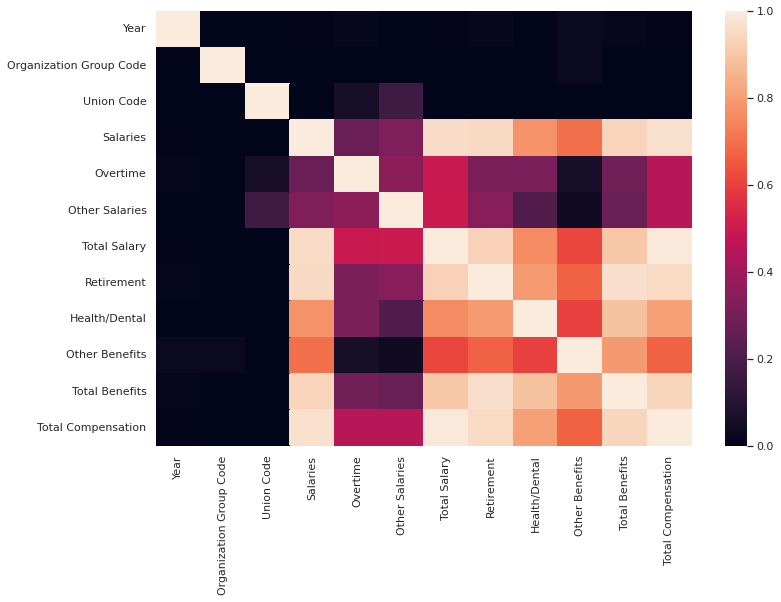

In [ ]:
ax = sns.heatmap(rows, vmin=0, vmax=1, xticklabels = numericalColumns, yticklabels = numericalColumns)

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

categorical_col = [item[0] for item in dataset.dtypes if item[1].startswith('string')]
#print(categorical_col)
op_col = [i+"_indexed" for i in categorical_col]
#print(op_col)

indexer = StringIndexer(inputCols = categorical_col, outputCols = op_col, handleInvalid='keep')
model = indexer.fit(dataset)
indexed_df = model.transform(dataset)

#indexed_df.show(5,False)

out_col = [i+"Vec" for i in categorical_col]
encoder = OneHotEncoder(inputCols= op_col, outputCols=out_col)
encodedDF = encoder.fit(indexed_df).transform(indexed_df)
encodedDF.select('Year Type_indexed','Year TypeVec','Department Code_indexed','Department CodeVec',
                 'Job Family Code_indexed', 'Job Family CodeVec', 'Job Code_indexed', 'Job CodeVec').show(5, False)
print(encodedDF.columns)


+-----------------+-------------+-----------------------+------------------+-----------------------+------------------+----------------+------------------+
|Year Type_indexed|Year TypeVec |Department Code_indexed|Department CodeVec|Job Family Code_indexed|Job Family CodeVec|Job Code_indexed|Job CodeVec       |
+-----------------+-------------+-----------------------+------------------+-----------------------+------------------+----------------+------------------+
|0.0              |(2,[0],[1.0])|19.0                   |(54,[19],[1.0])   |16.0                   |(56,[16],[1.0])   |15.0            |(1129,[15],[1.0]) |
|1.0              |(2,[1],[1.0])|43.0                   |(54,[43],[1.0])   |14.0                   |(56,[14],[1.0])   |135.0           |(1129,[135],[1.0])|
|1.0              |(2,[1],[1.0])|0.0                    |(54,[0],[1.0])    |5.0                    |(56,[5],[1.0])    |20.0            |(1129,[20],[1.0]) |
|0.0              |(2,[0],[1.0])|0.0                    |(54,[0]

In [ ]:
from pyspark.ml.feature import VectorAssembler

featurecol = ['Year', 'Organization Group Code', 'Union Code', 'Salaries', 'Overtime', 'Other Salaries',
 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Year TypeVec', 'Department CodeVec',
 'Job Family CodeVec', 'Job CodeVec']

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols= featurecol, outputCol= "features")
assembledDF = assembler.transform(encodedDF)


In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT

# Define a udf that converts sparse vector into dense vector
# You cannot create your own custom function and run that against the data directly. 
# In Spark, You have to register the function first using udf function
sparseToDense = F.udf(lambda v : Vectors.dense(v), VectorUDT())

# We then call the function here passing the column name on which the function has to be applied
densefeatureDF = assembledDF.withColumn('features_array', sparseToDense('features'))

densefeatureDF.select("features", "features_array").show(5, False)


+------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 6.2 Split the data into train and test set

In [ ]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF, testDF =  assembledDF.randomSplit([0.7,0.3], seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())


Observations in training set =  204120
Observations in testing set =  87412


### 7. Fit Linear Regression model on the data and check its performance

In [81]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10, 
                      regParam=0.8, elasticNetParam=0.1)
lr_model = lr.fit(trainDF)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))


RMSE: 3382.490099
r2: 0.997503
+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|143983.34282559267|         142735.79|(1252,[0,1,2,3,6,...|
|187189.69142449606|         198466.97|(1252,[0,1,2,3,6,...|
|188770.29347816907|         204307.53|(1252,[0,1,2,3,6,...|
| 166014.1783382262|         167077.82|(1252,[0,1,2,3,6,...|
|166343.20548946701|         167252.22|(1252,[0,1,2,3,6,...|
+------------------+------------------+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.997516


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT

# Define a udf that converts sparse vector into dense vector
# You cannot create your own custom function and run that against the data directly. 
# In Spark, You have to register the function first using udf function
sparseToDense = F.udf(lambda v : Vectors.dense(v), VectorUDT())

# We then call the function here passing the column name on which the function has to bea applied
densefeatureDF = assembledDF.withColumn('features_array', sparseToDense('features'))

densefeatureDF.select("features", "features_array").show(5, False)

+------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
densefeatureDF.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)
 |-- Year Type_indexed: double (nullable = false)
 |-- Department Code_indexed: double (nullable = false)
 |-- Job Family Code_indexed: double (nullable = false)
 |-- Job Code_indexed: double (nullable = false)
 |-- Year TypeVec: vector (nullable = true)
 |-- Department CodeVec: vecto

In [ ]:
# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler

# Create the StandardScaler object. It only take feature column (dense vector)
stdscaler = StandardScaler(inputCol= "features_array", outputCol= "scaledfeatures")

# Fit the StandardScaler object on the output of the dense vector data and transform
stdscaledDF = stdscaler.fit(densefeatureDF).transform(densefeatureDF)
stdscaledDF.select("scaledfeatures" ).show(5, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF1, testDF1 =  stdscaledDF.randomSplit([0.7,0.3], seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", trainDF1.count())
print("Observations in testing set = ", testDF1.count())

Observations in training set =  204120
Observations in testing set =  87412


In [70]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaledfeatures', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF1)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [77]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
dt_model.write().overwrite().save("/content/drive/MyDrive/Colab Notebooks/Model.sav")

##### Loading the model

In [84]:
# import PipelineModel from pyspark.ml package
from pyspark.ml.regression import DecisionTreeRegressionModel
#from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = DecisionTreeRegressionModel.load("/content/drive/MyDrive/Colab Notebooks/Model.sav")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(testDF1)

# print the results
prediction.select('Total Compensation', 'prediction').show(5)

+------------------+------------------+
|Total Compensation|        prediction|
+------------------+------------------+
|         142735.79|135521.34532217638|
|         198466.97|193678.47179061978|
|         204307.53|211762.14395969053|
|         167077.82|164514.12620260022|
|         167252.22|164514.12620260022|
+------------------+------------------+
only showing top 5 rows

